Minimum value of -q(x, y)s(x) - c2 + s(x): -0.3914624612740132, Maximum value: 0.6578877473830363
Minimum value of q(x, y)s(x) - c1 - u(x): -0.060000000000000005, Maximum value: 0.7


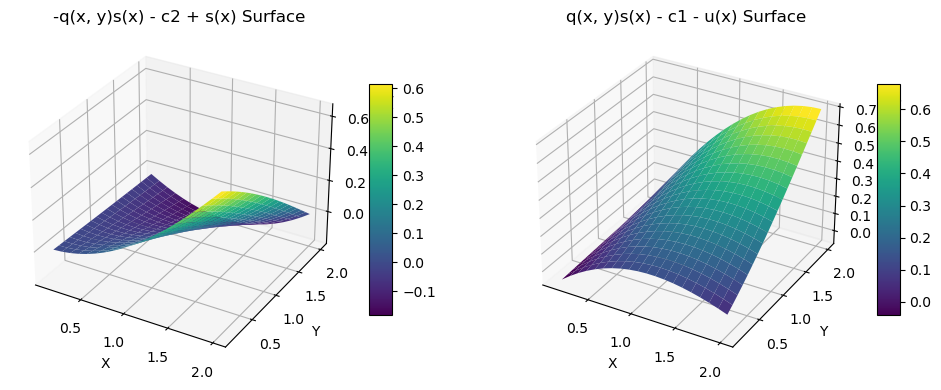

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
# Define the given functions
def s(x):
    return 0.5 * x
def q(x, y):
    integrand = lambda z: np.exp(-1/8 * (z - x)**2) / np.sqrt(2 * np.pi)
    result, _ = integrate.quad(integrand, -np.inf, y)
    return result
# Define parameters and functions
x_range = np.arange(0.1, 2.1, 0.1)
y_range = np.arange(0.1, 2.1, 0.1)
# Define constant c1
c1 = 0.1
# Define the interval for c2
c2_range = np.arange(0, 0.201, 0.001)
# Initialize result arrays
values_1 = np.zeros((len(x_range), len(y_range), len(c2_range)))
values_2 = np.zeros((len(x_range), len(y_range)))
# Calculate results
for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        for k, c2 in enumerate(c2_range):
            values_1[i, j, k] = -q(x, y) * s(x) - c2 + s(x)
        values_2[i, j] = q(x, y) * s(x) - c1 - 0.1 * x
# Initialize minimum and maximum values
min_value_1 = np.min(values_1)
max_value_1 = np.max(values_1)
min_value_2 = np.min(values_2)
max_value_2 = np.max(values_2)
# Output the minimum and maximum values of the results
print(f"Minimum value of -q(x, y)s(x) - c2 + s(x): {min_value_1}, Maximum value: {max_value_1}")
print(f"Minimum value of q(x, y)s(x) - c1 - u(x): {min_value_2}, Maximum value: {max_value_2}")
# Create 3D plots
fig = plt.figure(figsize=(12, 6))
# Plot surface for -q(x, y)s(x) - c2 + s(x)
ax1 = fig.add_subplot(121, projection='3d')
x, y = np.meshgrid(x_range, y_range)
surface1 = ax1.plot_surface(x, y, values_1[:, :, 0].T, cmap='viridis')  # Use the first array of values_1
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('-q(x, y)s(x) - c2 + s(x)')
ax1.set_title('-q(x, y)s(x) - c2 + s(x) Surface')
# Add color bar
fig.colorbar(surface1, ax=ax1, shrink=0.5, aspect=10)
# Plot surface for q(x, y)s(x) - c1 - u(x)
ax2 = fig.add_subplot(122, projection='3d')
surface2 = ax2.plot_surface(x, y, values_2.T, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('q(x, y)s(x) - c1 - u(x)')
ax2.set_title('q(x, y)s(x) - c1 - u(x) Surface')
# Add color bar
fig.colorbar(surface2, ax=ax2, shrink=0.5, aspect=10)
plt.show()


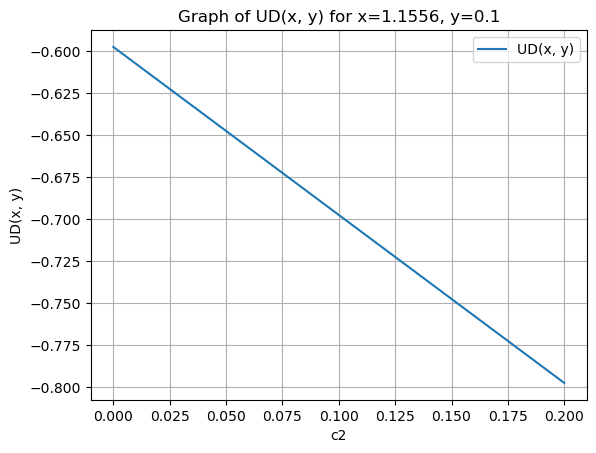

Maximum Value for UD(x, y): -0.5976381571498854
Minimum Value for UD(x, y): -0.7976381571498854


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the new integrand function
def new_integrand(z, x):
    return np.exp(-1/8 * (z - x)**2)

# Define the new upper limit function for integration
def new_upper_limit(x, y):
    result, _ = integrate.quad(lambda z: new_integrand(z, x), -np.inf, y)
    return result / np.sqrt(2 * np.pi)

# Define functions s(x), u(x), and W
def s(x):
    return 0.5 * x

def u(x):
    return 0.1 * x

W = 1.0  # Assume W has a value of 1.0

# Fixed x and y values
x_fixed = 1.1556
y_fixed = 0.1

# Define the range of c2 values
c2_values = np.linspace(0, 0.2, 100)

# Calculate UD(x, y) values
UD_values = [-new_upper_limit(x_fixed, y_fixed) * W - c2 * W for c2 in c2_values]

# Plot the graph for UD(x, y)
plt.plot(c2_values, UD_values, label='UD(x, y)')
plt.xlabel('c2')
plt.ylabel('UD(x, y)')
plt.title(f'Graph of UD(x, y) for x={x_fixed}, y={y_fixed}')
plt.legend()
plt.grid(True)
plt.show()

# Output the maximum and minimum values for UD(x, y)
max_value_ud = np.max(UD_values)
min_value_ud = np.min(UD_values)
print("Maximum Value for UD(x, y):", max_value_ud)
print("Minimum Value for UD(x, y):", min_value_ud)
